# Getting, Preprocessing, & Feature Engineering  

## Importing Libraries  

In [ ]:
# First we need to import the pandas module. Pandas is a library we use for data analysis  
import pandas as pd

## Getting the data

In [ ]:
# This is the link we use to get the data
start_year = '2023'
start_month = '10'
start_day = '30'

stop_year = '2024'
stop_month = '02'
stop_day = '26'

blue_colab_url = f'https://colabprod01.pace.edu/api/influx/sensordata/Alan/idk/range?stream=false&start_date={start_year}-{start_month}-{start_day}T00%3A00%3A00%2B00%3A00&stop_date={stop_year}-{stop_month}-{stop_day}T00%3A00%3A00%2B00%3A00'

# This get the data into a pandas Data Frame use this method
df = pd.read_json(blue_colab_url)

In [ ]:
df

If you run the code above you should be able to see that each row of the data frame as a timestamp and also data for the timestamp. The data, called sensor has a python dictionary containing the sensor measurements.

In [ ]:
df_normalized = pd.concat([df.drop(['sensors'], axis=1), df['sensors'].apply(pd.Series)], axis=1)

In [ ]:
df_normalized

Having columns of dictionaries is confusing right? So let's change it so every key has it's own column.

In [ ]:
df_graph = df_normalized.set_index(['timestamp'])
df_graph = df_graph.drop(columns=['measurement', 'deployment_id']) #,'lat','lon'])
df_graph

In [ ]:
df_graph.plot(subplots=True)

Further ideas
 - Dealing with missing data
 - Label Data as bad/warning/good based off bounds.  

 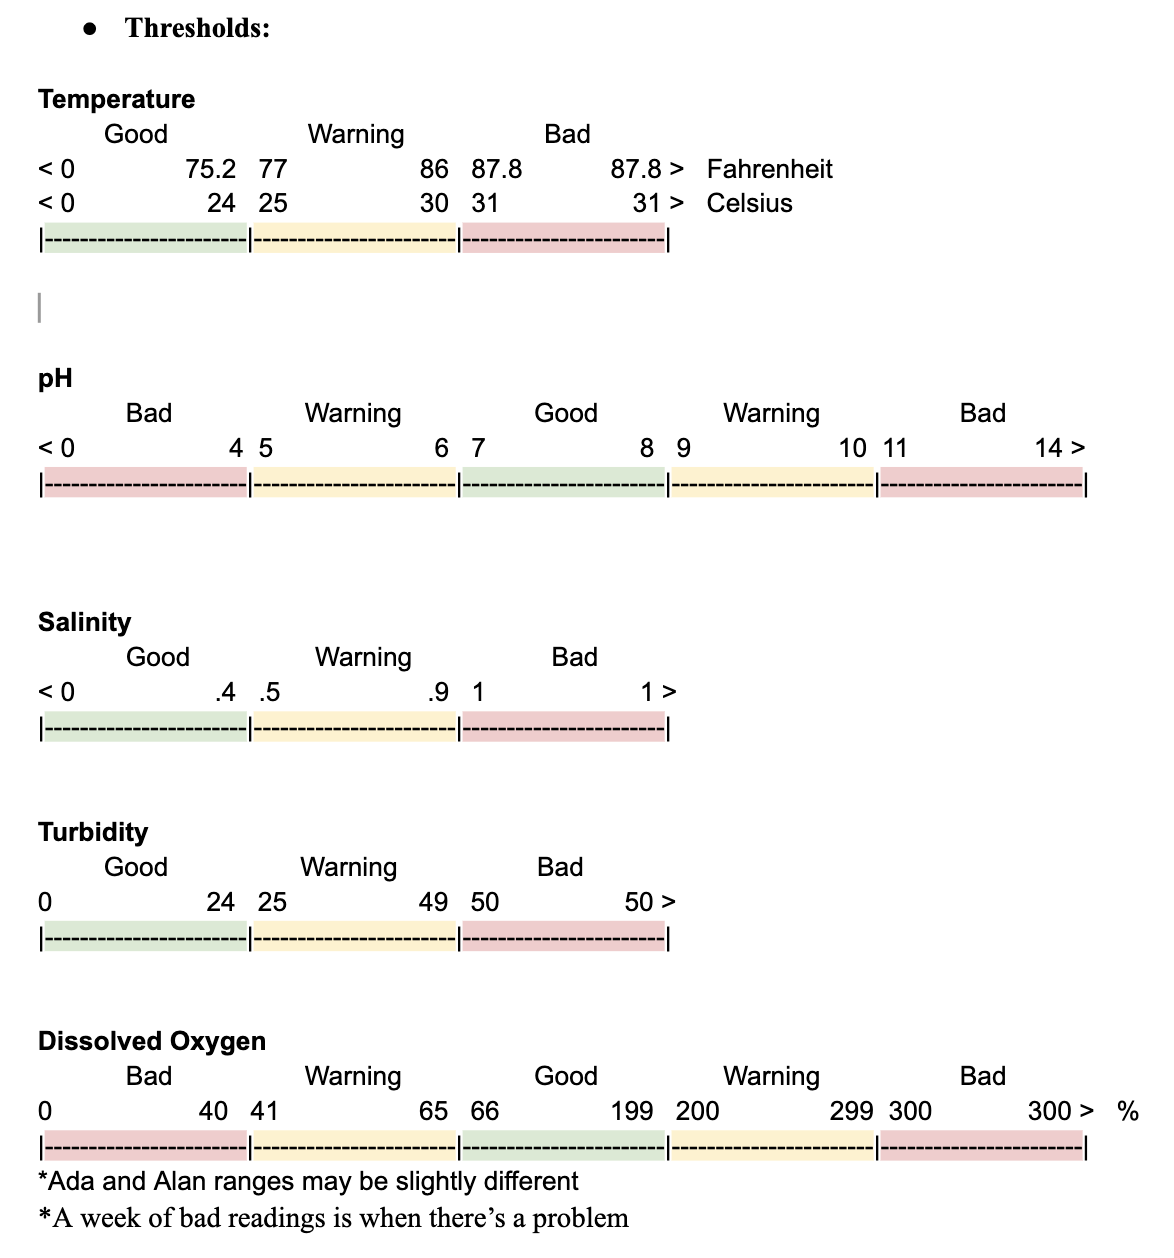